In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import pywt
import csv
import os
from glob import glob
# import noisereduce as nr
import shutil
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
# from python_speech_features import mfcc
# import scipy.io.wavfile as wav

In [ ]:
drive.mount('/content/drive')
directory = "/content"
base_path = "/content/drive/MyDrive/Skripsi"
normal_path = f'{base_path}{os.sep}Normal/'
audio_files_normal = glob(normal_path  + '*.wav')
Preprocess_normal = f'{base_path}{os.sep}Preprocess_Normal/'
Extracted_wavelet_N = f'{base_path}{os.sep}Wavelet_Extracted_N/'
audio_files_N = glob(Preprocess_normal  + '*.wav')

Mounted at /content/drive


# MFCC

In [ ]:
def feature_extraction2(file_path):
    x,sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=x, sr = sample_rate)
    return mfcc

In [ ]:
features2 = {}
features_mfcc_test = []
directory2 = Preprocess_normal
for audio in os.listdir(directory2):
    audio_path = directory2+audio
    features2[audio_path] = feature_extraction2(audio_path)
    features_mfcc_test.append(feature_extraction2(audio_path))

In [ ]:
label = []
annotation = []
for i in range (280):
  annotation.append(0)
  label.append("Normal")

In [ ]:
df_annotation = pd.DataFrame({'Annotation' : annotation})
df_annotation.head(10)

,Annotation
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
file_test = normal_path + 'LUSB.wav'
signaltst, srtst = librosa.load(file_test)

## MFCC Mean

In [ ]:
mfcc_means = []
for i in features_mfcc_test:
  mean = np.mean(i,dtype=np.float64)
  mfcc_means.append(mean)

df_mfcc_means = pd.DataFrame({'MFCC Means' : mfcc_means})
df_mfcc_means.head(10)

,MFCC Means
0,-42.176311
1,-38.678546
2,-42.119177
3,-40.606774
4,-40.996157
5,-40.428030
6,-37.869753
7,-42.233508
8,-40.064918
9,-40.497410


## MFCC Std

In [ ]:
mfcc_std = []
for i in features_mfcc_test:
  std = np.std(i)
  mfcc_std.append(std)

df_mfcc_std = pd.DataFrame({'MFCC std' : mfcc_std})
df_mfcc_std.head(10)

,MFCC std
0,233.856766
1,220.438614
2,223.893082
3,231.169693
4,223.516068
5,223.033127
6,210.162323
7,226.478836
8,212.822479
9,219.134308


## MFCC Max

In [ ]:
mfcc_max = []
for i in features_mfcc_test:
  max = np.max(i)
  mfcc_max.append(max)

df_mfcc_max = pd.DataFrame({'MFCC max' : mfcc_max})
df_mfcc_max.head(10)

,MFCC max
0,219.790009
1,198.498260
2,229.160950
3,194.393250
4,199.869843
5,161.972641
6,182.637573
7,168.881287
8,156.033249
9,170.946808


## MFCC Min

In [ ]:
mfcc_min = []
for i in features_mfcc_test:
  Min = np.min(i)
  mfcc_min.append(Min)

df_mfcc_min = pd.DataFrame({'MFCC min' : mfcc_min})
df_mfcc_min

,MFCC min
0,-1096.364380
1,-1041.821533
2,-1044.020142
3,-1093.010254
4,-1040.303345
...,...
275,-1052.359009
276,-977.815063
277,-1074.227661
278,-972.107361


In [ ]:
mfcc_Med = []
for i in features_mfcc_test:
  Med = np.median(i)
  mfcc_Med.append(Med)

Text(0.5, 0, 'Data Ke')

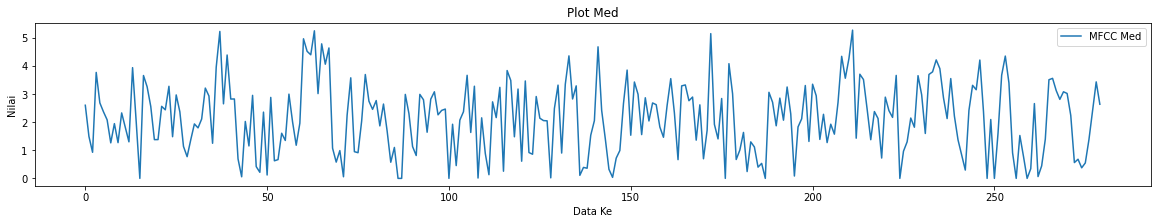

In [ ]:
df_med = pd.DataFrame(mfcc_Med, columns=['MFCC Med']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_med.plot.line()

plt.title('Plot Med')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Var = []
for i in features_mfcc_test:
  Var = np.var(i)
  mfcc_Var.append(Var)

Text(0.5, 0, 'Data Ke')

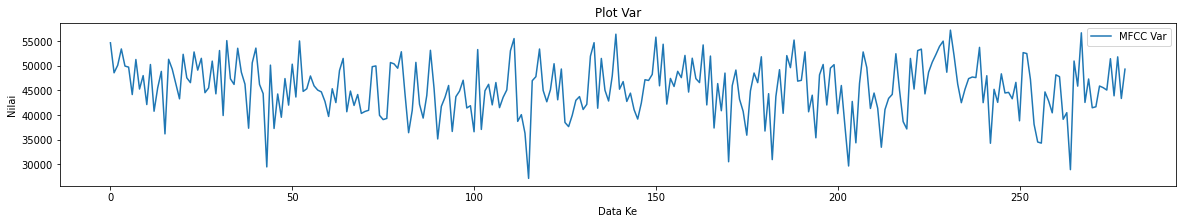

In [ ]:
df_var = pd.DataFrame(mfcc_Var, columns=['MFCC Var']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_var.plot.line()

plt.title('Plot Var')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
from scipy.stats import skew

In [ ]:
mfcc_Skew = []
for i in features_mfcc_test:
  Skew = skew(i, axis=0, bias=True)
  mfcc_Skew.append(Skew)

In [ ]:
skew_means = []
for i in mfcc_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

Text(0.5, 0, 'Data Ke')

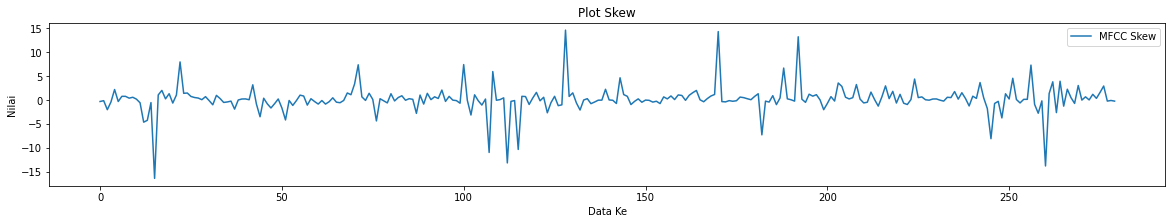

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['MFCC Skew']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_skew.plot.line()

plt.title('Plot Skew')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Q1 = []
for i in features_mfcc_test:
  Q1 = np.percentile(i, 25) 
  mfcc_Q1.append(Q1)

Text(0.5, 0, 'Data Ke')

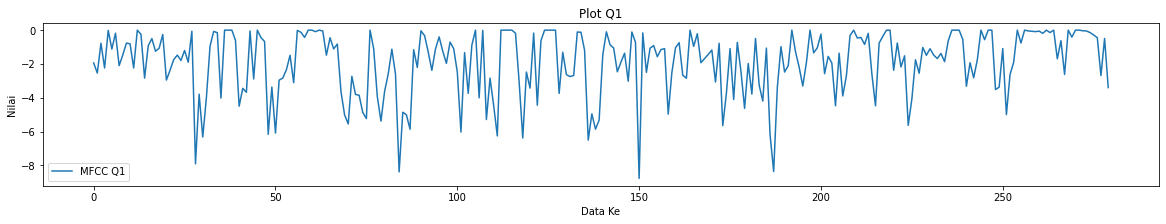

In [ ]:
df_q1 = pd.DataFrame(mfcc_Q1, columns=['MFCC Q1']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_q1.plot.line()

plt.title('Plot Q1')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Q3 = []
for i in features_mfcc_test:
  Q3 = np.percentile(i, 75) 
  mfcc_Q3.append(Q3)

Text(0.5, 0, 'Data Ke')

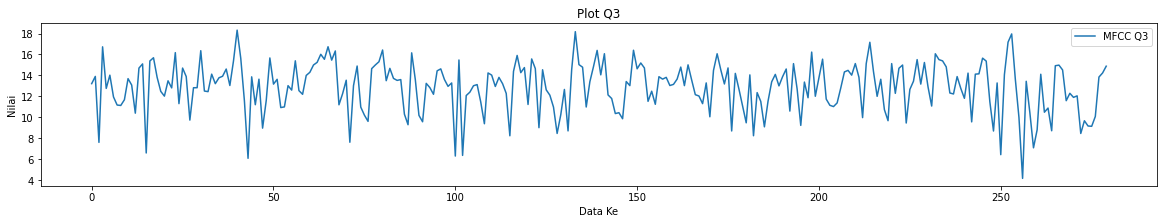

In [ ]:
df_q3 = pd.DataFrame(mfcc_Q3, columns=['MFCC Q3']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_q3.plot.line()

plt.title('Plot Q3')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_IQR = []
IQR = np.array(mfcc_Q3) - np.array(mfcc_Q1)
mfcc_IQR.append(IQR)

Text(0.5, 0, 'Data Ke')

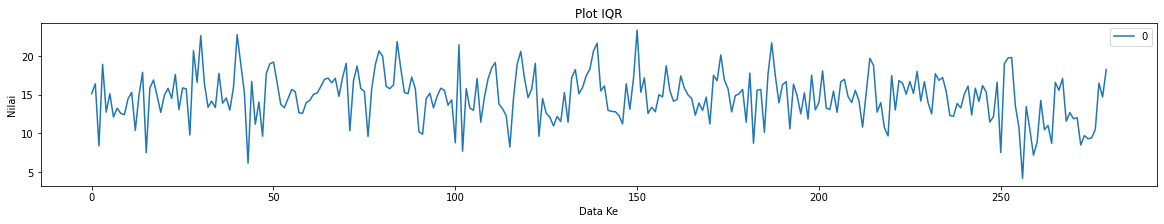

In [ ]:
df_iqr = pd.DataFrame(mfcc_IQR)
df_iqr = df_iqr.transpose()
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_iqr.plot.line()

plt.title('Plot IQR')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_range = []
Range = np.array(mfcc_max) - np.array(mfcc_min)
mfcc_range.append(Range)

Text(0.5, 0, 'Data Ke')

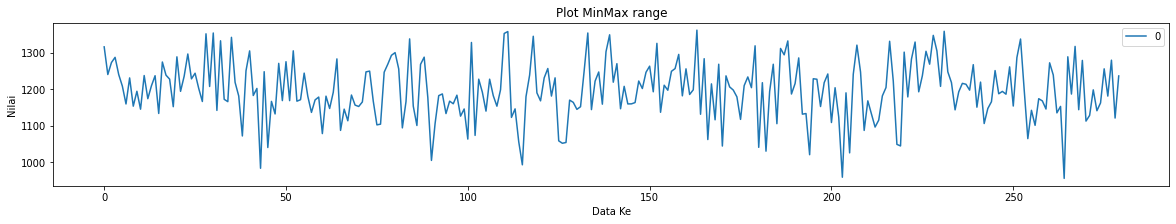

In [ ]:
df_range = pd.DataFrame(mfcc_range)
df_range = df_range.transpose()
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_range.plot.line()

plt.title('Plot MinMax range')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
from scipy.stats import kurtosis

In [ ]:
mfcc_Kurt = []
for i in features_mfcc_test:
  Kurt = kurtosis(i, axis=0, bias=True)
  mfcc_Kurt.append(Kurt)

In [ ]:
kurt_means = []
for i in mfcc_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

Text(0.5, 0, 'Data Ke')

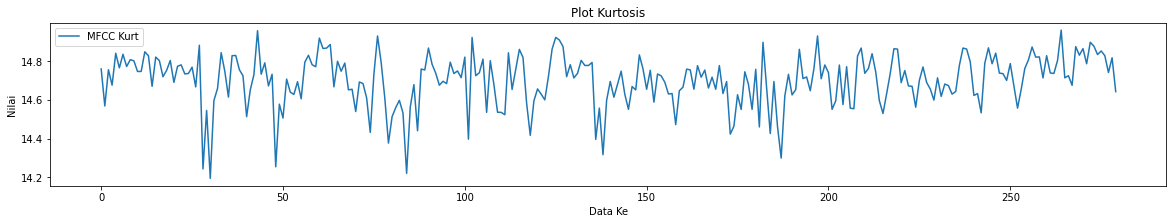

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['MFCC Kurt']) 
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_kurt.plot.line()

plt.title('Plot Kurtosis')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
df_mfcc_more = pd.DataFrame()

df_mfcc_more['Med_mfcc'] = df_med['MFCC Med']
df_mfcc_more['Var_mfcc'] = df_var['MFCC Var']
df_mfcc_more['Skew_mfcc'] = df_skew['MFCC Skew']
df_mfcc_more['Q1_mfcc'] = df_q1['MFCC Q1']
df_mfcc_more['Q3_mfcc'] = df_q3['MFCC Q3']
df_mfcc_more['IQR_mfcc'] = df_iqr[0]
df_mfcc_more['MinMax_mfcc'] = df_range[0]
df_mfcc_more['Kurt_mfcc'] = df_kurt['MFCC Kurt']
df_mfcc_more

,Med_mfcc,Var_mfcc,Skew_mfcc,Q1_mfcc,Q3_mfcc,IQR_mfcc,MinMax_mfcc,Kurt_mfcc
0,2.602459,54688.984375,-0.307273,-1.944778,13.215208,15.159986,1316.154419,14.760298
1,1.491520,48593.183594,-0.135403,-2.539967,13.905562,16.445530,1240.319824,14.568579
2,0.928406,50128.109375,-2.023971,-0.774896,7.611469,8.386365,1273.181152,14.756204
3,3.771168,53439.429688,-0.402931,-2.239144,16.729580,18.968724,1287.403564,14.676457
4,2.686728,49959.433594,2.201469,-0.013425,12.761908,12.775334,1240.173218,14.841538
...,...,...,...,...,...,...,...,...
275,0.549520,51457.757812,1.597842,-0.286086,9.145444,9.431530,1255.928589,14.853420
276,1.378954,43908.316406,2.933090,-0.450641,10.081318,10.531958,1181.177979,14.829218
277,2.411068,51832.828125,-0.223834,-2.691939,13.844451,16.536390,1279.637695,14.742040
278,3.434311,43371.054688,-0.092440,-0.491200,14.234071,14.725271,1120.981689,14.818130


## MFCC Plot

Text(0.5, 0, 'Data Ke')

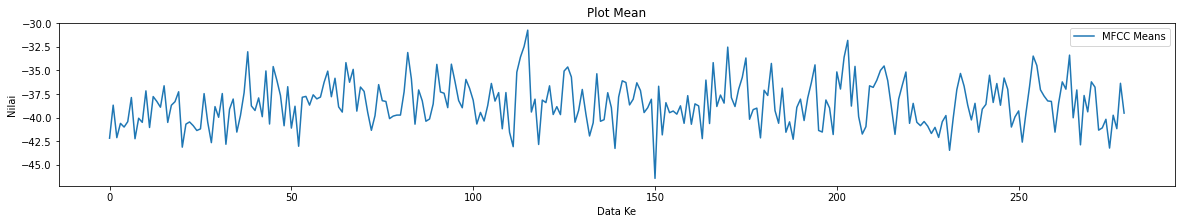

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mfcc_means.plot.line()

plt.title('Plot Mean')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')


Text(0.5, 0, 'Data Ke')

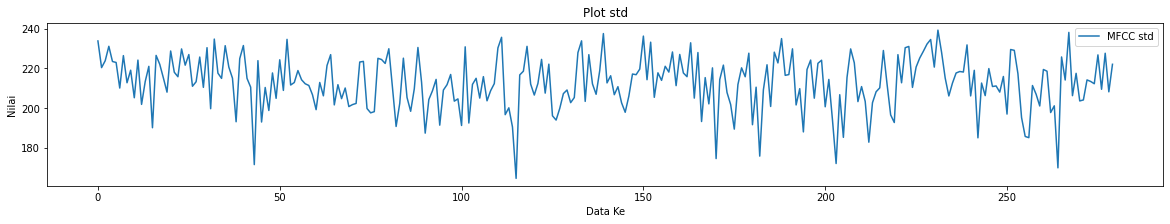

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mfcc_std.plot.line()

plt.title('Plot std')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

Text(0.5, 0, 'Data Ke')

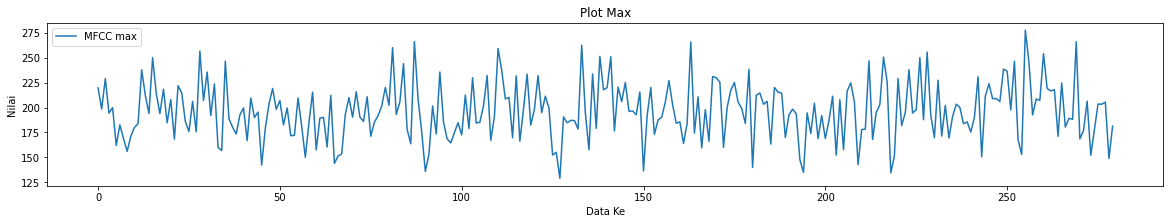

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mfcc_max.plot.line()

plt.title('Plot Max')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')


Text(0.5, 0, 'Data Ke')

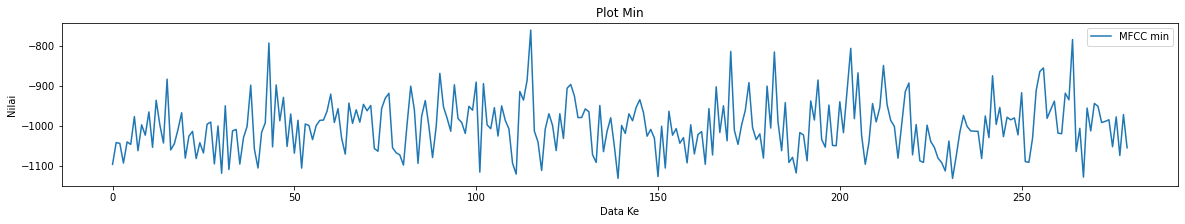

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mfcc_min.plot.line()

plt.title('Plot Min')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

# Entropy

In [ ]:
from scipy.stats import entropy
def shannonenergycount(file_path):
    x,sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    x_series = pd.Series(x)
    counts = x_series.value_counts()
    entropy_shanon = entropy(counts)
    return entropy_shanon

In [ ]:
shanonenergy = []
shanonpath = Preprocess_normal
for audio in os.listdir(shanonpath):
    audio_path = shanonpath+audio
    results = shannonenergycount(audio_path)
    shanonenergy.append(results)

In [ ]:
df_shanon_normal = pd.DataFrame({'Entropy' : shanonenergy})
df_shanon_normal.head(10)

,Entropy
0,13.400132
1,13.400333
2,13.399880
3,13.400157
4,13.400125
5,13.400327
6,13.399991
7,13.400086
8,13.399788
9,13.400218


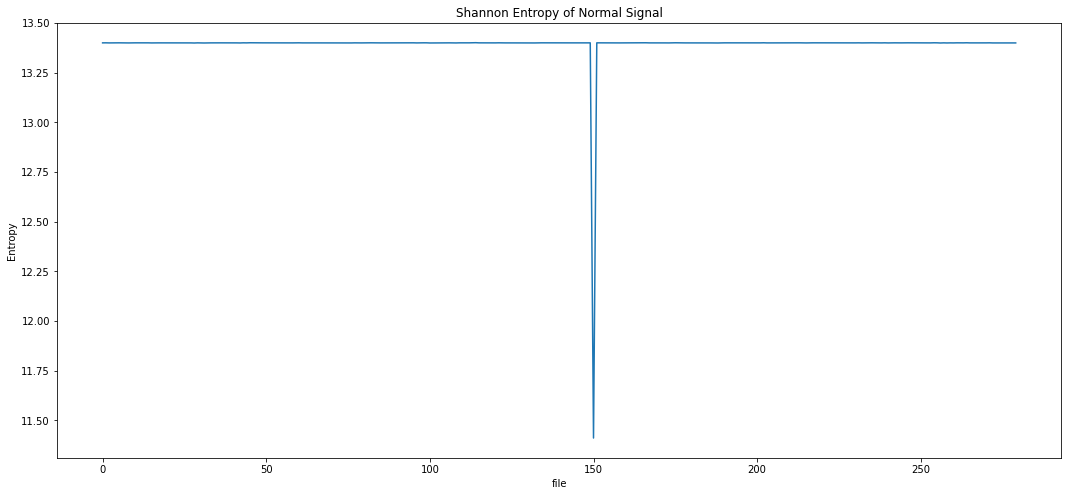

In [ ]:
plt.figure(figsize=(18, 8))
plt.title("Shannon Entropy of Normal Signal")
plt.plot(df_shanon_normal)
plt.ylabel('Entropy')
plt.xlabel('file')
plt.show()

# Wavelet

In [ ]:
def wavelet_extraction(data, coeff, dwt, db, level):
    N = np.array(data).size
    a, ds = dwt[0], list(reversed(dwt[1:]))

    if coeff =='a':
        return pywt.upcoef('a', a, db, level=level)[:N]
    elif coeff == 'd':
        return pywt.upcoef('d', ds[level-1], db, level=level)[:N]
    else:
        raise ValueError("Invalid coefficients: {}".format(coeff))

In [ ]:
features_wavelet = []
wavelet_file = []
count = 1
db = 'db2'
level = 4
directory = Preprocess_normal
for audio in os.listdir(directory):
    audio_path = directory+audio
    data_wave, sr = librosa.load(audio_path, res_type='kaiser_fast')
    coeffs = pywt.wavedec(data_wave, db, level=level)
    A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
    D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
    D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
    D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
    D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
    wavelets = A4 + D4 + D3 + D2 + D1
    file_name = "Extracted_wavelet_N_%s.csv" % count
    pd.DataFrame(wavelets).to_csv(file_name)
    wavelet_file.append(file_name)
    features_wavelet.append(wavelets)
    count = count+1

In [ ]:
base_directory = "/content"
for f in wavelet_file:
    src_path = os.path.join(base_directory, f)
    dst_path = os.path.join(Extracted_wavelet_N, f)
    shutil.move(src_path, dst_path)

In [ ]:
features_wavelet

In [ ]:
path = Preprocess_normal + "Preprocessed_N_3.wav"

In [ ]:
data_wave, sr = librosa.load(path, res_type='kaiser_fast')
coeffs = pywt.wavedec(data_wave, db, level=level)
A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
wavelets = A4 + D4 + D3 + D2 + D1

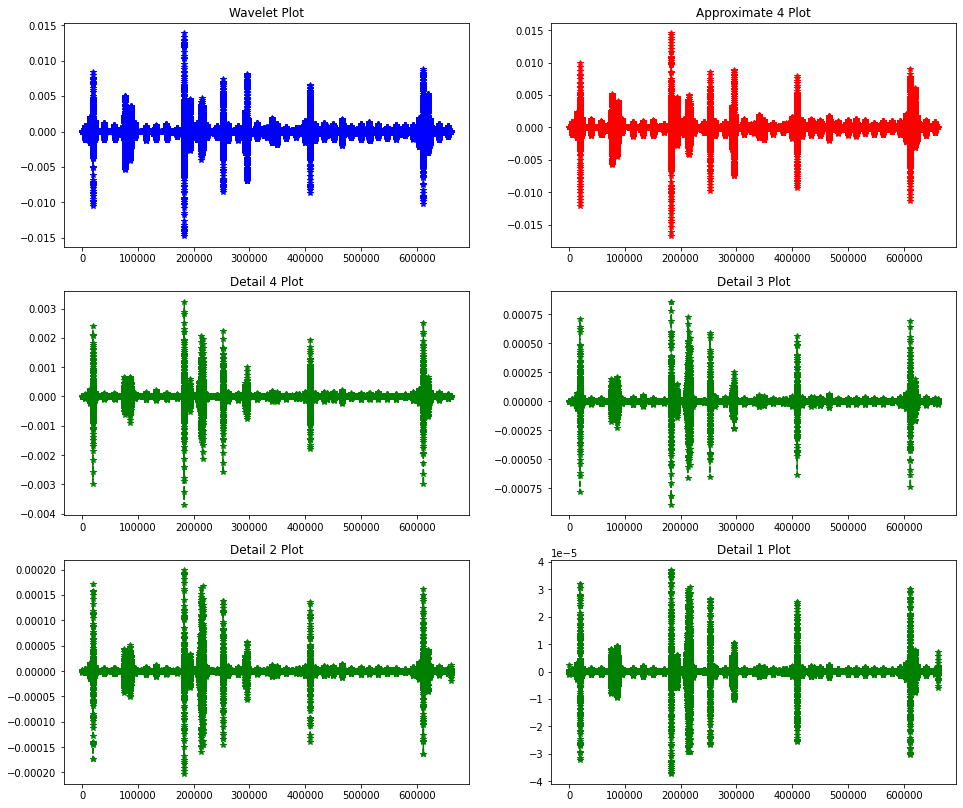

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(16,14))
  
axis[0, 0].plot(wavelets, '--*b')
axis[0, 0].set_title("Wavelet Plot")
  
axis[0, 1].plot(A4, '--*r')
axis[0, 1].set_title("Approximate 4 Plot")
  
axis[1, 0].plot(D4, '--*g')
axis[1, 0].set_title("Detail 4 Plot")

axis[1, 1].plot(D3, '--*g')
axis[1, 1].set_title("Detail 3 Plot")

axis[2, 0].plot(D2, '--*g')
axis[2, 0].set_title("Detail 2 Plot")

axis[2, 1].plot(D1, '--*g')
axis[2, 1].set_title("Detail 1 Plot")

plt.show()

## Wavelet Means

In [ ]:
wavelet_means = []
for i in features_wavelet:
  mean = np.mean(i,dtype=np.float64)
  wavelet_means.append(mean)

df_wavelet_means = pd.DataFrame({'Wavelet Means' : wavelet_means})
df_wavelet_means.head(10)

,Wavelet Means
0,2.575785e-08
1,-1.170269e-08
2,-6.802771e-09
3,-1.394466e-08
4,-2.047032e-08
5,1.060635e-07
6,1.088863e-07
7,4.469719e-08
8,3.191350e-09
9,-1.980033e-10


## Wavelet Std

In [ ]:
wavelet_std = []
for i in features_wavelet:
  std = np.std(i)
  wavelet_std.append(std)

df_wavelet_std = pd.DataFrame({'Wavelet std' : wavelet_std})
df_wavelet_std.head(10)

,Wavelet std
0,0.000264
1,0.000487
2,0.000303
3,0.000249
4,0.000254
5,0.000454
6,0.000697
7,0.000337
8,0.000289
9,0.000405


## Wavelet Max

In [ ]:
wavelet_max = []
for i in features_wavelet:
  max = np.max(i)
  wavelet_max.append(max)

df_wavelet_max = pd.DataFrame({'Wavelet max' : wavelet_max})
df_wavelet_max.head(10)

,Wavelet max
0,0.007242
1,0.004586
2,0.013897
3,0.003023
4,0.009374
5,0.005252
6,0.007987
7,0.003714
8,0.007078
9,0.004828


## Wavelet Min

In [ ]:
wavelet_min = []
for i in features_wavelet:
  Min = np.min(i)
  wavelet_min.append(Min)

df_wavelet_min = pd.DataFrame({'Wavelet min' : wavelet_min})
df_wavelet_min.head(10)

,Wavelet min
0,-0.005889
1,-0.004987
2,-0.014787
3,-0.005013
4,-0.005117
5,-0.004098
6,-0.007793
7,-0.003563
8,-0.006704
9,-0.005628


In [ ]:
wavelet_Med = []
for i in features_wavelet:
  Med = np.median(i)
  wavelet_Med.append(Med)

In [ ]:
df_med = pd.DataFrame(wavelet_Med, columns=['Wav Med']) 
df_med

,Wav Med
0,1.280774e-09
1,-3.395260e-09
2,4.772034e-09
3,7.767895e-09
4,-1.084987e-08
...,...
275,-1.054110e-08
276,6.903586e-09
277,-2.821842e-08
278,1.533144e-08


In [ ]:
wavelet_Var = []
for i in features_wavelet:
  Var = np.var(i)
  wavelet_Var.append(Var)

In [ ]:
df_var = pd.DataFrame(wavelet_Var, columns=['Wav Var']) 
df_var

,Wav Var
0,6.995023e-08
1,2.369311e-07
2,9.169018e-08
3,6.218050e-08
4,6.462040e-08
...,...
275,9.666980e-08
276,1.075760e-07
277,4.169307e-08
278,7.369021e-07


In [ ]:
from scipy.stats import skew

In [ ]:
wavelet_Skew = []
for i in features_wavelet:
  Skew = skew(i, axis=0, bias=True)
  wavelet_Skew.append(Skew)

In [ ]:
skew_means = []
for i in wavelet_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['Wav Skew']) 
df_skew

,Wav Skew
0,-0.307273
1,-0.135403
2,-2.023971
3,-0.402931
4,2.201469
...,...
275,1.597842
276,2.933090
277,-0.223834
278,-0.092440


In [ ]:
wavelet_Q1 = []
for i in features_wavelet:
  Q1 = np.percentile(i, 25) 
  wavelet_Q1.append(Q1)

In [ ]:
df_q1 = pd.DataFrame(wavelet_Q1, columns=['Wav Q1']) 
df_q1

,Wav Q1
0,-0.000003
1,-0.000017
2,-0.000001
3,-0.000006
4,-0.000004
...,...
275,-0.000001
276,-0.000005
277,-0.000007
278,-0.000007


In [ ]:
wavelet_Q3 = []
for i in features_wavelet:
  Q3 = np.percentile(i, 75) 
  wavelet_Q3.append(Q3)

In [ ]:
df_q3 = pd.DataFrame(wavelet_Q3, columns=['Wav Q3']) 
df_q3

,Wav Q3
0,3.106348e-06
1,1.656954e-05
2,1.508569e-06
3,6.720696e-06
4,3.290804e-06
...,...
275,9.355650e-07
276,4.712389e-06
277,5.739436e-06
278,8.130915e-06


In [ ]:
wavelet_IQR = []
IQR = np.array(wavelet_Q3) - np.array(wavelet_Q1)
wavelet_IQR.append(IQR)

In [ ]:
df_iqr = pd.DataFrame(wavelet_IQR)
df_iqr = df_iqr.transpose()

In [ ]:
wavelet_range = []
Range = np.array(wavelet_max) - np.array(wavelet_min)
wavelet_range.append(Range)

In [ ]:
df_range = pd.DataFrame(wavelet_range)
df_range = df_range.transpose()

In [ ]:
from scipy.stats import kurtosis

In [ ]:
wavelet_Kurt = []
for i in features_wavelet:
  Kurt = kurtosis(i, axis=0, bias=True)
  wavelet_Kurt.append(Kurt)

In [ ]:
kurt_means = []
for i in wavelet_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['Wav Kurt']) 
df_kurt

,Wav Kurt
0,48.431253
1,17.898286
2,388.555058
3,24.641763
4,89.506651
...,...
275,117.568733
276,509.492473
277,58.348043
278,21.022171


In [ ]:
df_wavelet = pd.DataFrame()

df_wavelet['Med_wavelet'] = df_med['Wav Med']
df_wavelet['Var_wavelet'] = df_var['Wav Var']
df_wavelet['Skew_wavelet'] = df_skew['Wav Skew']
df_wavelet['Q1_wavelet'] = df_q1['Wav Q1']
df_wavelet['Q3_wavelet'] = df_q3['Wav Q3']
df_wavelet['IQR_wavelet'] = df_iqr[0]
df_wavelet['MinMax_wavelet'] = df_range[0]
df_wavelet['Kurt_wavelet'] = df_kurt['Wav Kurt']
df_wavelet

,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet
0,1.280774e-09,6.995023e-08,-0.307273,-0.000003,3.106348e-06,0.000006,0.013130,48.431253
1,-3.395260e-09,2.369311e-07,-0.135403,-0.000017,1.656954e-05,0.000034,0.009574,17.898286
2,4.772034e-09,9.169018e-08,-2.023971,-0.000001,1.508569e-06,0.000003,0.028684,388.555058
3,7.767895e-09,6.218050e-08,-0.402931,-0.000006,6.720696e-06,0.000013,0.008036,24.641763
4,-1.084987e-08,6.462040e-08,2.201469,-0.000004,3.290804e-06,0.000007,0.014491,89.506651
...,...,...,...,...,...,...,...,...
275,-1.054110e-08,9.666980e-08,1.597842,-0.000001,9.355650e-07,0.000002,0.021348,117.568733
276,6.903586e-09,1.075760e-07,2.933090,-0.000005,4.712389e-06,0.000009,0.028789,509.492473
277,-2.821842e-08,4.169307e-08,-0.223834,-0.000007,5.739436e-06,0.000012,0.010239,58.348043
278,1.533144e-08,7.369021e-07,-0.092440,-0.000007,8.130915e-06,0.000015,0.015890,21.022171


## Combine Feature

In [ ]:
label = []
annotation = []
for i in range (280):
  annotation.append(1)
  label.append("Normal")

In [ ]:
df_label = pd.DataFrame({'Label' : label})
df_label.head(10)

,Label
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
5,Normal
6,Normal
7,Normal
8,Normal
9,Normal


In [ ]:
df_annotation = pd.DataFrame({'Annotation' : annotation})
df_annotation.head(10)

,Annotation
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df_features_normal = pd.concat([df_mfcc_means, df_mfcc_std, df_mfcc_max,df_mfcc_min,
                                df_shanon_normal,
                                df_wavelet_means,df_wavelet_std,df_wavelet_max,df_wavelet_min,
                                df_mfcc_more,df_wavelet,
                                df_annotation,df_label], axis=1)


In [ ]:
file_name = 'feature_normal_more.xlsx'
df_features_normal.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
